In [3]:
import numpy as np

In [4]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter = "\t")
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [5]:
print(data.size)

1486


In [6]:
x = data[:,0]
y = data[:,1]
sp.sum(sp.isnan(y))

8

In [7]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [8]:
# функция, вычисляющая погрешность апроксимации, где f(x) - обученная модельная функция 
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [9]:
# поиск функции, которая даёт наилучшую аппроксим.данных 
# (здесь полином 1-й степени - линейная аппроксим.)
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full = True)
print("Параметры модели: %s" % fp1)
print("Невязки:", residuals)

Параметры модели: [   2.59619213  989.02487106]
Невязки: [  3.17389767e+08]


In [10]:
# poly1d() - построение модельной функции по параметрам модели (вычислены выше) 
f1 = sp.poly1d(fp1)
print("Погрешность:", error(f1, x, y))

Погрешность: 317389767.34


In [11]:
f2p = sp.polyfit(x, y, 2)
print("Параметры модели: %s" % f2p)
f2 = sp.poly1d(f2p)
print("Погрешность:", error(f2, x, y))

Параметры модели: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Погрешность: 179983507.878


In [12]:
f45p = sp.polyfit(x, y, 45)
print("Параметры модели: %s" % f45p)
f45 = sp.poly1d(f45p)
print("Погрешность:", error(f45, x, y))

Параметры модели: [ -7.94089424e-119   1.02553046e-115   4.11528837e-113  -2.86028526e-110
  -4.36572349e-107  -2.25582412e-104   3.11747751e-102   1.61717812e-098
   1.52645907e-095   7.07208877e-093  -1.18747066e-090  -5.51834469e-087
  -5.52424490e-084  -2.97535470e-081  -7.43873128e-080   1.70456519e-075
   1.97862707e-072   1.20147225e-069   1.44428447e-067  -5.71945893e-064
  -7.14553704e-061  -4.19167729e-058  -2.86237178e-057   2.56249074e-052
   2.58727324e-049   9.06385592e-047  -7.80940721e-044  -1.25691948e-040
  -5.37372339e-038   3.96257504e-035   6.09516770e-032   9.10542476e-030
  -3.55492606e-026  -1.63762001e-023   2.18428008e-020   7.76235707e-018
  -1.83608572e-014   1.11120345e-011  -3.72832614e-009   7.88211323e-007
  -1.08401012e-004   9.59896996e-003  -5.21960171e-001   1.57049483e+001
  -2.08993230e+002   2.27396750e+003]
Погрешность: 110174897.746


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


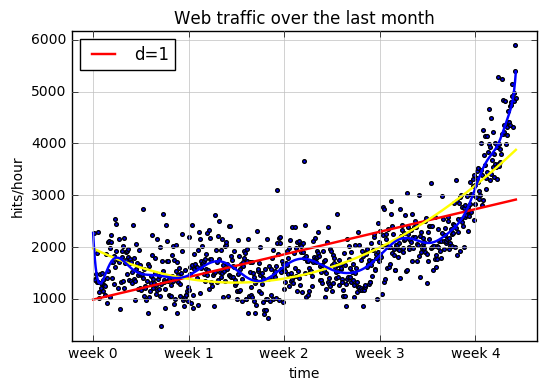

In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y, s=7)
plt.title("Web traffic over the last month")
plt.xlabel("time")
plt.ylabel("hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)]) 
plt.autoscale(tight = True)
plt.grid(True, linestyle='-', color='0.75')

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 1.75, color = 'red')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.plot(fx, f2(fx), linewidth = 1.75, color='yellow')
plt.plot(fx, f45(fx), linewidth = 1.75, color='blue')

plt.show()

In [14]:
inflection = 3.5*7*24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [15]:
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

In [29]:
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [17]:
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


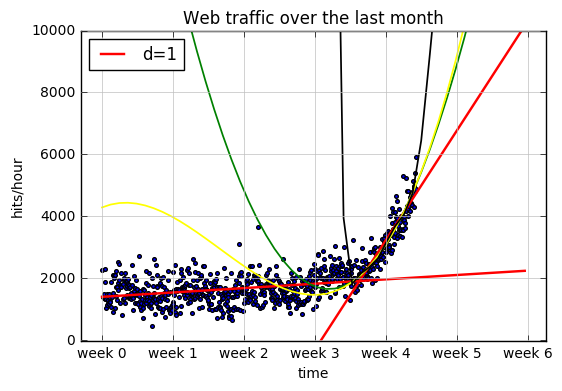

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y, s=7)
plt.title("Web traffic over the last month")
plt.xlabel("time")
plt.ylabel("hits/hour")
plt.xticks([w*7*24 for w in range(30)],
           ['week %i' % w for w in range(30)]) 
plt.autoscale(tight = True)
plt.grid(True, linestyle='-', color='0.75')
plt.ylim(-10, 10000)

fx = sp.linspace(0, 1000)
plt.plot(fx, fa(fx), linewidth = 1.75, color = 'red')
plt.plot(fx, fb(fx), linewidth = 1.75, color = 'red')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.plot(fx, fb2(fx), linewidth = 1.25, color = 'green')
plt.plot(fx, fb3(fx), linewidth = 1.25, color = 'yellow')
plt.plot(fx, fb10(fx), linewidth = 1.25, color = 'black')

plt.show()

In [33]:
fb2_error = error(fb2, xb, yb)
print("Error 2 inflection=%f" % (fb2_error))
fb3_error = error(fb3, xb, yb)
print("Error 3 inflection=%f" % (fb3_error))
fb10_error = error(fb10, xb, yb)
print("Error 10 inflection=%f" % (fb10_error))

Error 2 inflection=19768846.989176
Error 3 inflection=19766452.361027
Error 10 inflection=18949296.662610
